In [1]:
from sklearn.cross_decomposition import CCA
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def pad(data):
    eps = np.unique(data[:,0])
    samples = data
    padded = samples.copy()
    for i in eps:
        count = np.count_nonzero(samples[:,0] == i)
        if count < 10:
            max_idx = np.max(np.where(padded[:,0] == i)[0])
            #print(i,10-count,max_idx)
            for j in range(10-count):
                #print("Inserting %s at %s" % (padded[max_idx][0], max_idx+1+j))
                padded = np.insert(padded,max_idx+1+j,padded[max_idx],axis=0)
                #print(j,padded.shape)
                
    return padded

In [3]:
def load_data(prefix):
    two_cubes = pd.read_csv("trial-data/{}-2cubes.csv".format(prefix), header= None)
    cube_sphere = pd.read_csv("trial-data/{}-cube_sphere.csv".format(prefix), header= None)
    cube_cylinder = pd.read_csv("trial-data/{}-cube_cylinder.csv".format(prefix), header= None)
    cube_capsule = pd.read_csv("trial-data/{}-cube_capsule.csv".format(prefix), header= None)
    big_small = pd.read_csv("trial-data/{}-bigcube_smallcube.csv".format(prefix), header= None)
    return two_cubes,cube_sphere,cube_cylinder,cube_capsule,big_small

In [4]:
def compute_cca(cat1, cat2, n_components=1, c=1):
    cca = CCA(n_components=n_components)
    cca.fit(cat1, cat2)
    X_c, Y_c = cca.transform(cat1, cat2)
    return np.corrcoef(X_c[:, c-1], Y_c[:, c-1])[0,1]

In [5]:
def angles_sub(mat1, mat2):
    mat1_Q, _ = np.linalg.qr(mat1)
    mat2_Q, _ = np.linalg.qr(mat2)
    phi, sigma, psi = np.linalg.svd(mat1_Q.T @ mat2_Q)
    u = mat1_Q @ phi
    v = mat2_Q @ psi
    return math.acos(u[:,0].T @ v[:,0])

In [6]:
results = {}
n = 1000

# 122921 (Accurate Policy)

In [7]:
prefix = "122921"
results[prefix] = {}
two_cubes,cube_sphere,cube_cylinder,cube_capsule,big_small = load_data(prefix)

In [8]:
two_cubes = pd.DataFrame(pad(two_cubes.to_numpy()))
two_cubes = two_cubes.drop(two_cubes.iloc[:,16:22], axis = 1)
two_cubes = two_cubes.drop(two_cubes.iloc[:,0:3], axis = 1)
two_cubes = two_cubes.head(n)

cube_sphere = pd.DataFrame(pad(cube_sphere.to_numpy()))
cube_sphere = cube_sphere.drop(cube_sphere.iloc[:,16:22], axis = 1)
cube_sphere = cube_sphere.drop(cube_sphere.iloc[:,0:3], axis = 1)
cube_sphere = cube_sphere.head(n)

cube_cylinder = pd.DataFrame(pad(cube_cylinder.to_numpy()))
cube_cylinder = cube_cylinder.drop(cube_cylinder.iloc[:,16:22], axis = 1)
cube_cylinder = cube_cylinder.drop(cube_cylinder.iloc[:,0:3], axis = 1)
cube_cylinder = cube_cylinder.head(n)

cube_capsule = pd.DataFrame(pad(cube_capsule.to_numpy()))
cube_capsule = cube_capsule.drop(cube_capsule.iloc[:,16:22], axis = 1)
cube_capsule = cube_capsule.drop(cube_capsule.iloc[:,0:3], axis = 1)
cube_capsule = cube_capsule.head(n)

big_small = pd.DataFrame(pad(big_small.to_numpy()))
big_small = big_small.drop(big_small.iloc[:,16:22], axis = 1)
big_small = big_small.drop(big_small.iloc[:,0:3], axis = 1)
big_small = big_small.head(n)

two_cubes.shape,cube_sphere.shape,cube_cylinder.shape,cube_capsule.shape,big_small.shape

((1000, 19), (1000, 19), (1000, 19), (1000, 19), (1000, 19))

In [9]:
cat_list = [two_cubes,cube_sphere,cube_cylinder,cube_capsule,big_small]

In [10]:
mat = np.zeros(shape=(len(cat_list),len(cat_list)))
for i in range(len(cat_list)):
    for j in range(len(cat_list)):
        mat[i,j] = compute_cca(cat_list[i], cat_list[j])
results[prefix][1] = mat
results[prefix][1]

array([[1.        , 0.42586473, 0.9800603 , 0.6063402 , 0.62609622],
       [0.42636487, 1.        , 0.37373963, 0.84051826, 0.35167682],
       [0.98005134, 0.37373121, 1.        , 0.59140617, 0.51501876],
       [0.61207176, 0.84051762, 0.59140227, 1.        , 0.454233  ],
       [0.62680454, 0.35119712, 0.51417321, 0.45421884, 1.        ]])

In [11]:
mat = np.zeros(shape=(len(cat_list),len(cat_list)))
for i in range(len(cat_list)):
    for j in range(len(cat_list)):
        mat[i,j] = compute_cca(cat_list[i], cat_list[j], n_components=2, c=2)
results[prefix][2] = mat
results[prefix][2]

array([[1.        , 0.37079949, 0.95567156, 0.55568278, 0.46342739],
       [0.37075349, 1.        , 0.26499469, 0.41838411, 0.31684421],
       [0.95619012, 0.26499551, 1.        , 0.54912537, 0.47510493],
       [0.55056531, 0.41838437, 0.54912897, 1.        , 0.38669919],
       [0.46300666, 0.31726797, 0.47588576, 0.38670979, 1.        ]])

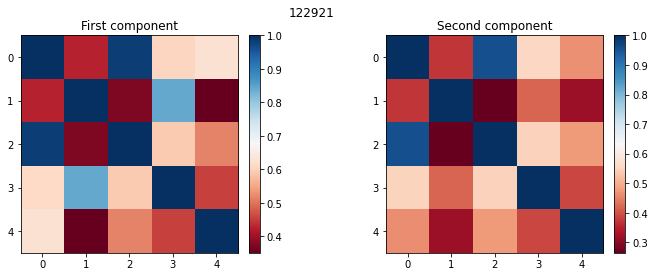

In [12]:
fig = plt.figure(figsize=(12, 4))
fig.suptitle(prefix)

ax1 = fig.add_subplot(121)
ax1.title.set_text('First component')
im1 = ax1.imshow(results[prefix][1], cmap='RdBu')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(122)
ax2.title.set_text('Second component')
im2 = ax2.imshow(results[prefix][2], cmap='RdBu')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im2, cax=cax, orientation='vertical')

In [13]:
compute_cca(big_small, two_cubes), compute_cca(big_small, two_cubes, 2, 2)

(0.6268045392192606, 0.46300665512516403)

In [14]:
compute_cca(cube_sphere, two_cubes), compute_cca(cube_sphere, two_cubes, 2, 2)

(0.4263648701435914, 0.37075349231717836)

In [15]:
compute_cca(cube_cylinder, two_cubes), compute_cca(cube_cylinder, two_cubes, 2, 2)

(0.9800513402837515, 0.9561901163140822)

In [16]:
compute_cca(cube_capsule, two_cubes), compute_cca(cube_capsule, two_cubes, 2, 2)

(0.6120717625259475, 0.5505653090929054)

In [17]:
compute_cca(big_small, cube_sphere), compute_cca(big_small, cube_sphere, 2, 2)

(0.35119711884200994, 0.3172679714403035)

In [18]:
compute_cca(cube_cylinder, cube_sphere), compute_cca(cube_cylinder, cube_sphere, 2, 2)

(0.3737312123093586, 0.26499550673957434)

In [19]:
compute_cca(cube_capsule, cube_sphere), compute_cca(cube_capsule, cube_sphere, 2, 2)

(0.8405176161390105, 0.4183843672146387)

In [20]:
compute_cca(big_small, cube_cylinder), compute_cca(big_small, cube_cylinder, 2, 2)

(0.5141732114749205, 0.47588575612383377)

In [21]:
compute_cca(cube_capsule, cube_cylinder), compute_cca(cube_capsule, cube_cylinder, 2, 2)

(0.5914022686428344, 0.5491289670218881)

## Angles

In [22]:
angles_sub(two_cubes, big_small)

1.4101357212731198

In [23]:
angles_sub(two_cubes, cube_sphere)

1.511104471553036

In [24]:
angles_sub(two_cubes, cube_cylinder)

1.3630511567784958

In [25]:
angles_sub(two_cubes, cube_capsule)

1.382398452989845

# 122521 (Imprecise Policy)

In [26]:
prefix = "122521"
results[prefix] = {}
two_cubes,cube_sphere,cube_cylinder,cube_capsule,big_small = load_data(prefix)

In [27]:
two_cubes = pd.DataFrame(pad(two_cubes.to_numpy()))
two_cubes = two_cubes.drop(two_cubes.iloc[:,16:22], axis = 1)
two_cubes = two_cubes.drop(two_cubes.iloc[:,0:3], axis = 1)
two_cubes = two_cubes.head(n)

cube_sphere = pd.DataFrame(pad(cube_sphere.to_numpy()))
cube_sphere = cube_sphere.drop(cube_sphere.iloc[:,16:22], axis = 1)
cube_sphere = cube_sphere.drop(cube_sphere.iloc[:,0:3], axis = 1)
cube_sphere = cube_sphere.head(n)

cube_cylinder = pd.DataFrame(pad(cube_cylinder.to_numpy()))
cube_cylinder = cube_cylinder.drop(cube_cylinder.iloc[:,16:22], axis = 1)
cube_cylinder = cube_cylinder.drop(cube_cylinder.iloc[:,0:3], axis = 1)
cube_cylinder = cube_cylinder.head(n)

cube_capsule = pd.DataFrame(pad(cube_capsule.to_numpy()))
cube_capsule = cube_capsule.drop(cube_capsule.iloc[:,16:22], axis = 1)
cube_capsule = cube_capsule.drop(cube_capsule.iloc[:,0:3], axis = 1)
cube_capsule = cube_capsule.head(n)

big_small = pd.DataFrame(pad(big_small.to_numpy()))
big_small = big_small.drop(big_small.iloc[:,16:22], axis = 1)
big_small = big_small.drop(big_small.iloc[:,0:3], axis = 1)
big_small = big_small.head(n)

two_cubes.shape,cube_sphere.shape,cube_cylinder.shape,cube_capsule.shape,big_small.shape

((1000, 19), (1000, 19), (1000, 19), (1000, 19), (1000, 19))

In [28]:
cat_list = [two_cubes,cube_sphere,cube_cylinder,cube_capsule,big_small]

In [29]:
mat = np.zeros(shape=(len(cat_list),len(cat_list)))
for i in range(len(cat_list)):
    for j in range(len(cat_list)):
        mat[i,j] = compute_cca(cat_list[i], cat_list[j])
results[prefix][1] = mat
results[prefix][1]

array([[1.        , 0.42663672, 0.93672038, 0.73246551, 0.98960025],
       [0.42664853, 1.        , 0.35594381, 0.84287243, 0.35131188],
       [0.96731786, 0.35592128, 1.        , 0.76614282, 0.54062887],
       [0.73248577, 0.84287121, 0.76614292, 1.        , 0.5613697 ],
       [0.98960303, 0.35131201, 0.5406328 , 0.5613624 , 1.        ]])

In [30]:
mat = np.zeros(shape=(len(cat_list),len(cat_list)))
for i in range(len(cat_list)):
    for j in range(len(cat_list)):
        mat[i,j] = compute_cca(cat_list[i], cat_list[j], n_components=2, c=2)
results[prefix][2] = mat
results[prefix][2]

array([[1.        , 0.31776647, 0.96110162, 0.58440419, 0.63510899],
       [0.31776405, 1.        , 0.32380286, 0.37047884, 0.32025288],
       [0.93602639, 0.32374716, 1.        , 0.56531539, 0.50363773],
       [0.58438816, 0.37047879, 0.56531778, 1.        , 0.49828536],
       [0.63510667, 0.32025052, 0.50439686, 0.49829185, 1.        ]])

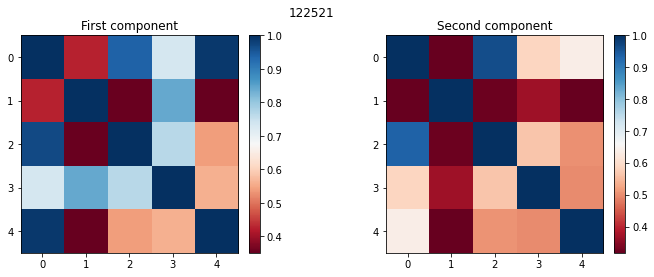

In [31]:
fig = plt.figure(figsize=(12, 4))
fig.suptitle(prefix)

ax1 = fig.add_subplot(121)
ax1.title.set_text('First component')
im1 = ax1.imshow(results[prefix][1], cmap='RdBu')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(122)
ax2.title.set_text('Second component')
im2 = ax2.imshow(results[prefix][2], cmap='RdBu')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im2, cax=cax, orientation='vertical')

In [32]:
compute_cca(big_small, two_cubes), compute_cca(big_small, two_cubes, 2, 2)

(0.9896030314929232, 0.6351066723047347)

In [33]:
compute_cca(cube_sphere, two_cubes), compute_cca(cube_sphere, two_cubes, 2, 2)

(0.4266485255732164, 0.31776405265301216)

In [34]:
compute_cca(cube_cylinder, two_cubes), compute_cca(cube_cylinder, two_cubes, 2, 2)

(0.9673178608923243, 0.9360263891835824)

In [35]:
compute_cca(cube_capsule, two_cubes), compute_cca(cube_capsule, two_cubes, 2, 2)

(0.7324857718185895, 0.5843881604165471)

In [36]:
compute_cca(big_small, cube_sphere), compute_cca(big_small, cube_sphere, 2, 2)

(0.35131201197020495, 0.32025052048075037)

In [37]:
compute_cca(cube_cylinder, cube_sphere), compute_cca(cube_cylinder, cube_sphere, 2, 2)

(0.35592128084296154, 0.323747156256293)

In [38]:
compute_cca(cube_capsule, cube_sphere), compute_cca(cube_capsule, cube_sphere, 2, 2)

(0.8428712079896387, 0.3704787895497431)

In [39]:
compute_cca(big_small, cube_cylinder), compute_cca(big_small, cube_cylinder, 2, 2)

(0.5406327952105061, 0.5043968579914784)

In [40]:
compute_cca(cube_capsule, cube_cylinder), compute_cca(cube_capsule, cube_cylinder, 2, 2)

(0.7661429187714269, 0.5653177835546)

## Angles

In [41]:
angles_sub(two_cubes, big_small)

1.832405111693747

In [42]:
angles_sub(two_cubes, cube_sphere)

1.587422879655476

In [43]:
angles_sub(two_cubes, cube_cylinder)

1.6536366966092033

In [44]:
angles_sub(two_cubes, cube_capsule)

1.5974740889578716

# Averages

In [48]:
results['122921'][1], results['122521'][1], (results['122921'][1]+results['122521'][1])/2.

(array([[1.        , 0.42586473, 0.9800603 , 0.6063402 , 0.62609622],
        [0.42636487, 1.        , 0.37373963, 0.84051826, 0.35167682],
        [0.98005134, 0.37373121, 1.        , 0.59140617, 0.51501876],
        [0.61207176, 0.84051762, 0.59140227, 1.        , 0.454233  ],
        [0.62680454, 0.35119712, 0.51417321, 0.45421884, 1.        ]]),
 array([[1.        , 0.42663672, 0.93672038, 0.73246551, 0.98960025],
        [0.42664853, 1.        , 0.35594381, 0.84287243, 0.35131188],
        [0.96731786, 0.35592128, 1.        , 0.76614282, 0.54062887],
        [0.73248577, 0.84287121, 0.76614292, 1.        , 0.5613697 ],
        [0.98960303, 0.35131201, 0.5406328 , 0.5613624 , 1.        ]]),
 array([[1.        , 0.42625073, 0.95839034, 0.66940285, 0.80784824],
        [0.4265067 , 1.        , 0.36484172, 0.84169534, 0.35149435],
        [0.9736846 , 0.36482625, 1.        , 0.6787745 , 0.52782382],
        [0.67227877, 0.84169441, 0.67877259, 1.        , 0.50780135],
        [0.80820

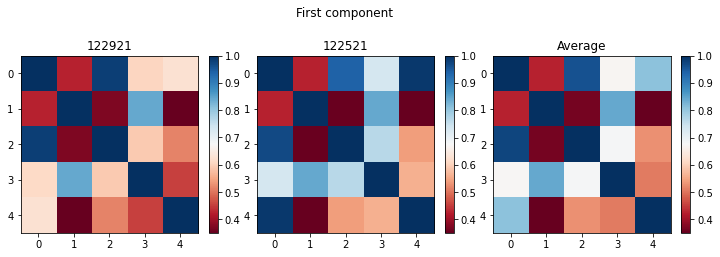

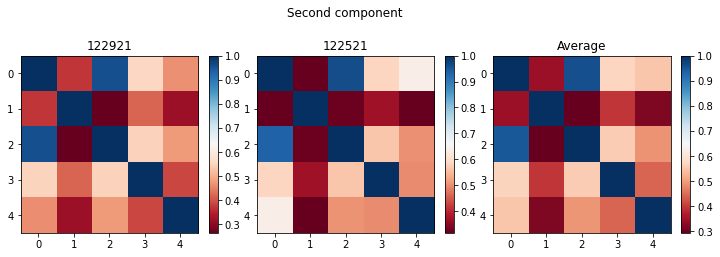

In [45]:
fig = plt.figure(figsize=(12, 4))
fig.suptitle('First component')

ax1 = fig.add_subplot(131)
ax1.title.set_text('122921')
im1 = ax1.imshow(results['122921'][1], cmap='RdBu')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(132)
ax2.title.set_text('122521')
im2 = ax2.imshow(results['122521'][1], cmap='RdBu')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(133)
ax3.title.set_text('Average')
im3 = ax3.imshow((results['122921'][1]+results['122521'][1])/2., cmap='RdBu')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im3, cax=cax, orientation='vertical')

fig = plt.figure(figsize=(12, 4))
fig.suptitle('Second component')

ax1 = fig.add_subplot(131)
ax1.title.set_text('122921')
im1 = ax1.imshow(results['122921'][2], cmap='RdBu')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(132)
ax2.title.set_text('122521')
im2 = ax2.imshow(results['122521'][2], cmap='RdBu')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(133)
ax3.title.set_text('Average')
im3 = ax3.imshow((results['122921'][2]+results['122521'][2])/2., cmap='RdBu')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.15)
fig.colorbar(im3, cax=cax, orientation='vertical')